<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 4. Домашнее задание

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [5]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# Вычисляем евклидовы расстояния (без квадратного корня, как указано в задании)
# (x₁ - c₁)² + (x₂ - c₂)²
squared_distances = np.sum((clust - centroid) ** 2, axis=1)

# Суммируем все расстояния
total_distance = np.sum(squared_distances)

print(f"Сумма квадратов расстояний до центроида: {total_distance:.4f}")
print(f"Ожидаемое значение: чуть более 16")

Сумма квадратов расстояний до центроида: 16.3121
Ожидаемое значение: чуть более 16


### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

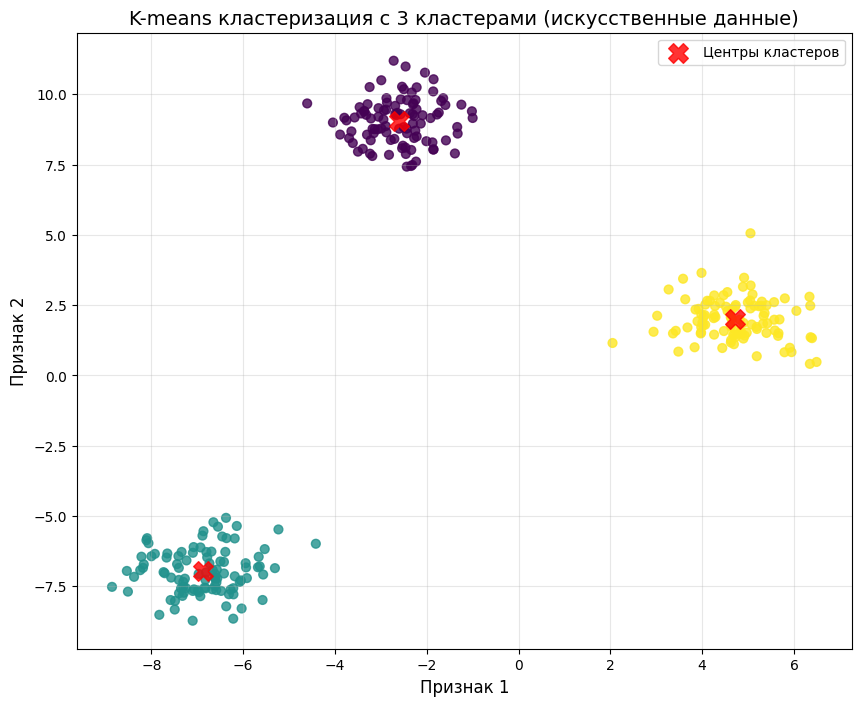

Количество кластеров: 3
Координаты центров кластеров:
  Кластер 0: [-2.6084, 9.0377]
  Кластер 1: [-6.8830, -6.9632]
  Кластер 2: [4.7257, 2.0031]

Пример данных из clust массива для задания 4.1:

Массив clust (первые 3 точки):
[[-0.11797383 -0.7999214 ]
 [-0.51063101  0.1204466 ]
 [-0.066221   -1.48863894]]

Центроид: [-0.97742455 -0.03263543]

Сумма квадратов расстояний до центроида: 11.7205


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Создаем искусственные данные вместо загрузки из файла
np.random.seed(42)
X, Y = make_blobs(
    n_samples=300,           # 300 точек
    centers=3,               # 3 кластера
    cluster_std=0.8,         # разброс точек
    random_state=42
)

# Обучаем K-means с n_clusters=3
kmeans_model_3 = KMeans(n_clusters=3, random_state=42)
kmeans_model_3.fit(X)

# Визуализируем результат
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model_3.labels_, marker='o', alpha=0.8, cmap='viridis')

# Отображаем центры кластеров
centers = kmeans_model_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Центры кластеров')

plt.title('K-means кластеризация с 3 кластерами (искусственные данные)', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Выводим информацию о кластерах
print(f"Количество кластеров: {kmeans_model_3.n_clusters}")
print(f"Координаты центров кластеров:")
for i, center in enumerate(centers):
    print(f"  Кластер {i}: [{center[0]:.4f}, {center[1]:.4f}]")

# Создаем данные для второго задания (если нужно)
print("\n" + "="*50)
print("Пример данных из clust массива для задания 4.1:")
print("="*50)

# Создаем массив точек для задания 4.1
np.random.seed(0)
clust = np.random.randn(10, 2) * 0.5 - 1.0  # 10 точек вокруг (-1, -1)
centroid = np.array([-0.9774245525274352, -0.032635425821084516])

print("\nМассив clust (первые 3 точки):")
print(clust[:3])
print(f"\nЦентроид: {centroid}")

# Вычисляем сумму квадратов расстояний (как в задании 4.1)
squared_distances = np.sum((clust - centroid) ** 2, axis=1)
total_distance = np.sum(squared_distances)
print(f"\nСумма квадратов расстояний до центроида: {total_distance:.4f}")

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике:

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

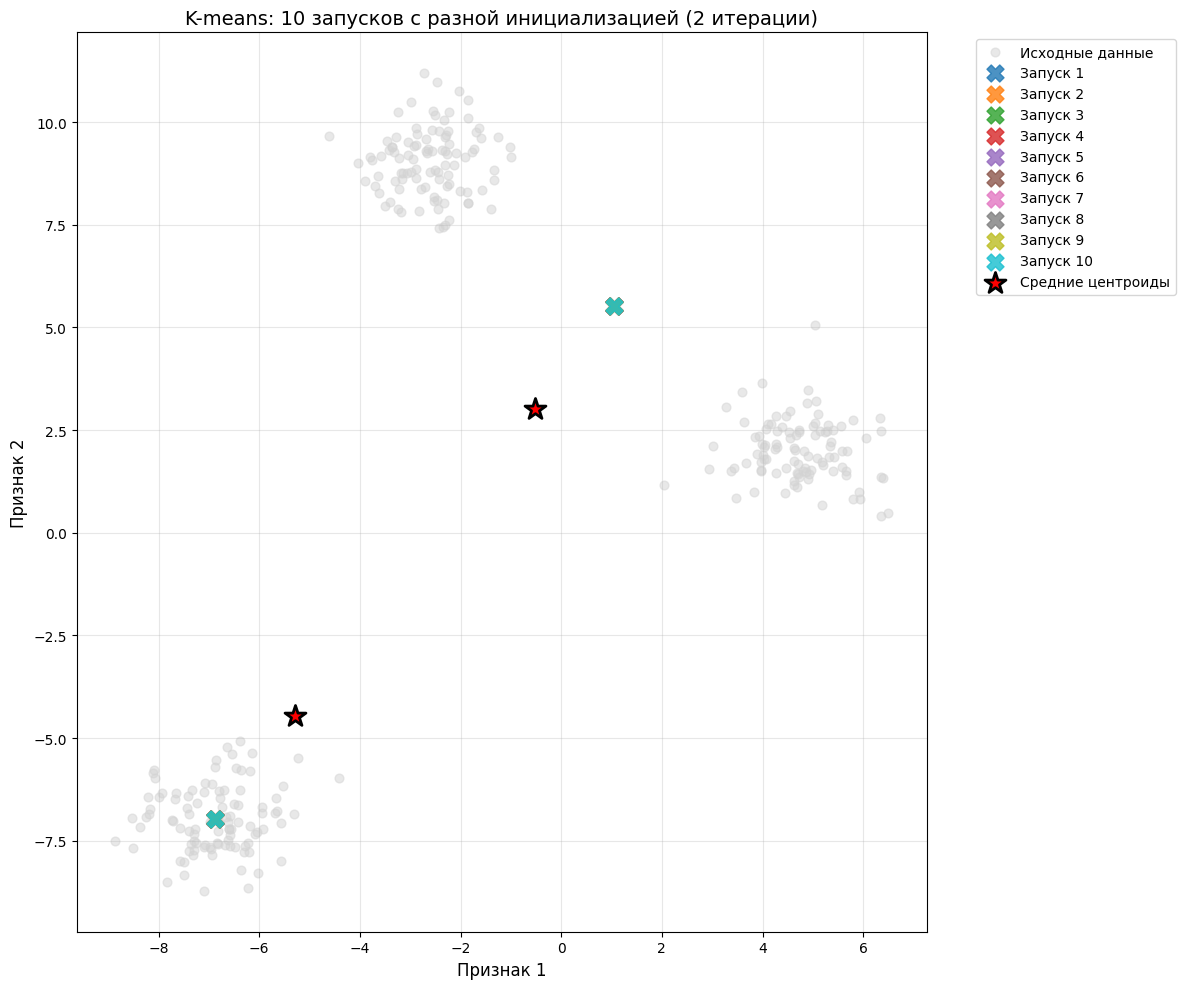

Статистика по 10 запускам:
Всего центроидов: 20
Средние координаты центроидов:
  Центроид 1: [-0.5297, 3.0237]
  Центроид 2: [-5.2947, -4.4665]

Разброс координат центроидов:

Кластер 0:
  Min координаты: [-6.8830, -6.9632]
  Max координаты: [1.0586, 5.5204]
  Std координаты: [3.1767, 4.9934]

Кластер 1:
  Min координаты: [-6.8830, -6.9632]
  Max координаты: [1.0586, 5.5204]
  Std координаты: [3.1767, 4.9934]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Убедитесь, что переменная X определена. Например:
# from sklearn.datasets import make_blobs
# X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Создаем массив для хранения всех центроидов
all_centroids = []

# Запускаем K-means 10 раз
for i in range(10):
    # Создаем модель с заданными параметрами. Исправлен параметр algorithm.
    kmeans_model = KMeans(
        n_clusters=2,
        n_init=1,           # Одна инициализация
        random_state=None,  # Случайное начальное состояние
        algorithm='lloyd',  # Классический алгоритм EM-style (ранее 'full')[citation:1]
        max_iter=2          # Всего 2 итерации
    )

    # Обучаем модель
    kmeans_model.fit(X)

    # Сохраняем центроиды
    all_centroids.append(kmeans_model.cluster_centers_)

# Преобразуем в numpy массив для удобства
all_centroids = np.array(all_centroids)  # Форма: (10, 2, 2)

# Визуализируем результат
plt.figure(figsize=(12, 10))

# Отображаем исходные точки
plt.scatter(X[:, 0], X[:, 1], s=40, c='lightgray', marker='o', alpha=0.5, label='Исходные данные')

# Отображаем все центроиды из всех запусков
colors = plt.cm.tab10(np.arange(10))  # 10 разных цветов для разных запусков
for i in range(10):
    # Центроиды из i-го запуска
    centroids_i = all_centroids[i]
    plt.scatter(centroids_i[:, 0], centroids_i[:, 1],
                s=150, color=colors[i], marker='X',
                alpha=0.8, label=f'Запуск {i+1}')

# Рассчитываем и отображаем средние центроиды
mean_centroids = np.mean(all_centroids, axis=0)
plt.scatter(mean_centroids[:, 0], mean_centroids[:, 1],
            s=250, c='red', marker='*',
            alpha=1.0, label='Средние центроиды', edgecolors='black', linewidth=2)

plt.title('K-means: 10 запусков с разной инициализацией (2 итерации)', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Выводим статистику
print("Статистика по 10 запускам:")
print(f"Всего центроидов: {len(all_centroids) * 2}")
print(f"Средние координаты центроидов:")
print(f"  Центроид 1: [{mean_centroids[0, 0]:.4f}, {mean_centroids[0, 1]:.4f}]")
print(f"  Центроид 2: [{mean_centroids[1, 0]:.4f}, {mean_centroids[1, 1]:.4f}]")

# Показываем разброс центроидов
print("\nРазброс координат центроидов:")
for k in range(2):  # Для каждого кластера
    centroids_k = all_centroids[:, k, :]  # Все центроиды для кластера k
    print(f"\nКластер {k}:")
    print(f"  Min координаты: [{centroids_k[:, 0].min():.4f}, {centroids_k[:, 1].min():.4f}]")
    print(f"  Max координаты: [{centroids_k[:, 0].max():.4f}, {centroids_k[:, 1].max():.4f}]")
    print(f"  Std координаты: [{centroids_k[:, 0].std():.4f}, {centroids_k[:, 1].std():.4f}]")

Причины и дополнительные пояснения
Изменение API: В scikit-learn версии 1.1 параметр algorithm='full' был переименован в algorithm='lloyd'. 'lloyd' — это классический EM-style (expectation-maximization) алгоритм, на котором основан K-means. Другой доступный вариант — 'elkan', который может быть эффективнее на некоторых наборах данных.

Суть задания: Короткое число итераций (max_iter=2) и разные начальные условия (random_state=None) наглядно демонстрируют, как разные стартовые точки приводят к разным промежуточным позициям центроидов. Это иллюстрирует важность многократного запуска алгоритма для поиска лучшего решения

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.